# <span style="color:#3E6BCE">1) 주제</span>

유명 축구선수 5명 얼굴 식별 (5명의 얼굴 이미지를 학습 후 식별)

# <span style="color:#3E6BCE">2) 프로젝트 구현 내용 설명 및 코드</span>

## library 호출

In [1]:
# CNN model 구현에 필요한 library 호출
import tensorflow as tf
from tensorflow.keras import layers, utils
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

## data 불러오기

In [2]:
# 크롤링한 폴더로부터 데이터를 불러들이고 train set 카테고리 개수를 출력해준다.
print(os.listdir("C:/Users/ballj/OneDrive/custom_dataset"))
fpath = "C:/Users/ballj/OneDrive/custom_dataset/train"
categories = os.listdir(fpath)
print("No. of categories of images in the train set = ",len(categories))
train_dir = 'C:/Users/ballj/OneDrive/custom_dataset/train'
test_dir = 'C:/Users/ballj/OneDrive/custom_dataset/test'

['test', 'train']
No. of categories of images in the train set =  5


## 카테고리별 이미지 resize 후 확인

unique_labels =  ['cristiano ronaldo profile', 'lewandowski profile', 'lionel messi profile', 'luka modric profile', 'zinedine zidane profile']


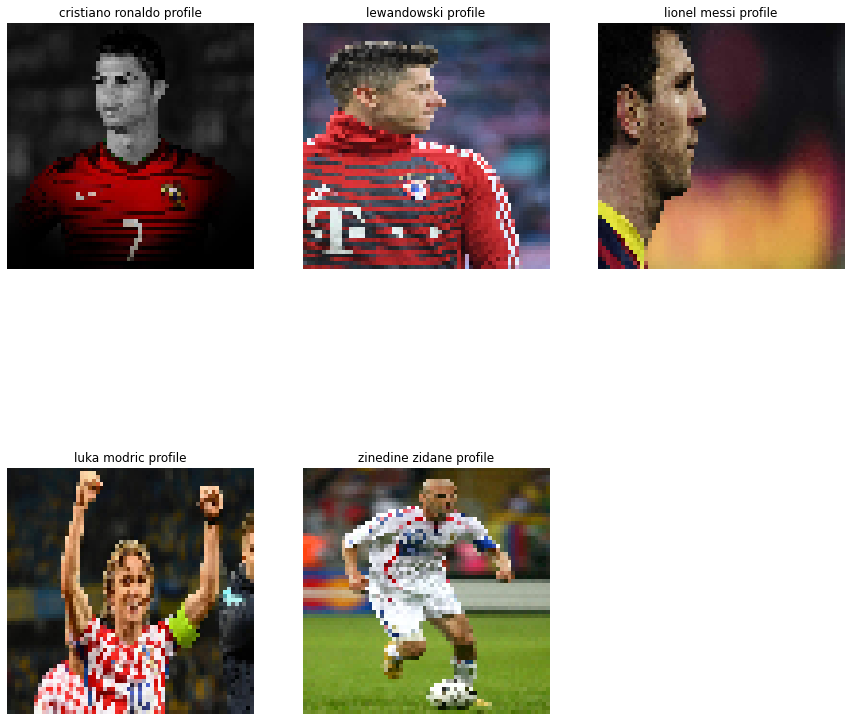

In [3]:
# 카테고리별 대표 이미지를 한개씩 출력
# 이미지를 labelling하고 크기를 동일하게 맞춰준 후 화면에 출력한다.
def load_unique():     
    size_img = 64,64 
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 2
col = 3
for i in range(1,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

# 아래 사진을 통해 카테고리 별로 이미지를 잘 불러들여왔음을 확인할 수 있다.

## train dataset, test dataset 준비

In [4]:
# train dataset, test dataset의 비율 및 구조를 보여준다.
labels_dict = {'cristiano ronaldo profile':0,'lewandowski profile':1,'lionel messi profile':2,'luka modric profile':3,'zinedine zidane profile':4}

def load_data():
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            if folder == 'cristiano ronaldo profile':
                labels.append(labels_dict['cristiano ronaldo profile'])
            elif folder == 'lewandowski profile':
                labels.append(labels_dict['lewandowski profile'])
            elif folder == 'lionel messi profile':
                labels.append(labels_dict['lionel messi profile'])
            elif folder == 'luka modric profile':
                labels.append(labels_dict['luka modric profile'])
            elif folder == 'zinedine zidane profile':
                labels.append(labels_dict['zinedine zidane profile'])
                    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    templabels = labels
    
    labels = keras.utils.to_categorical(labels)
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.1)
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test, templabels

In [5]:
# train data와 test data의 개수 출력
X_train, X_test, Y_train, Y_test, labels = load_data()

LOADING DATA FROM : cristiano ronaldo profile | lewandowski profile | lionel messi profile | luka modric profile | zinedine zidane profile | 
Loaded 2250 images for training, Train data shape = (2250, 64, 64, 3)
Loaded 250 images for testing Test data shape = (250, 64, 64, 3)


## CNN 모델구축

In [6]:
# CNN model을 구축한다.
def create_model():
    
    model = Sequential()
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(5, activation = 'softmax')) #분류  class가 5개니까 마지막 출력노드는 5개
    
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

# 구축한 모델을 그래프로 표현하는 함수이다.
def fit_model():
    model_hist = model.fit(X_train, Y_train, batch_size = 64, epochs = 100, validation_split = 0.1)
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    return model_hist 

In [8]:
# 모델 구조와 학습 과정 출력 모델 저장하기
model = create_model()  
curr_model_hist = fit_model()
score = model.evaluate(X_test, Y_test, verbose=1)
print('test_loss:', score[0], ' , test_acc:', score[1])
model.save("player.h5")

MODEL CREATED
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7

32/32 [==============================] - 8s 259ms/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.1030 - val_accuracy: 0.9689
Epoch 43/100
32/32 [==============================] - 8s 265ms/step - loss: 0.0826 - accuracy: 0.9778 - val_loss: 0.9646 - val_accuracy: 0.8089
Epoch 44/100
32/32 [==============================] - 8s 259ms/step - loss: 0.1023 - accuracy: 0.9664 - val_loss: 0.2187 - val_accuracy: 0.9556
Epoch 45/100
32/32 [==============================] - 8s 248ms/step - loss: 0.0674 - accuracy: 0.9822 - val_loss: 0.3572 - val_accuracy: 0.8978
Epoch 46/100
32/32 [==============================] - 8s 246ms/step - loss: 0.0883 - accuracy: 0.9778 - val_loss: 1.1504 - val_accuracy: 0.7600
Epoch 47/100
32/32 [==============================] - 8s 256ms/step - loss: 0.0434 - accuracy: 0.9822 - val_loss: 0.4423 - val_accuracy: 0.9244
Epoch 48/100
32/32 [==============================] - 8s 257ms/step - loss: 0.0409 - accuracy: 0.9891 - val_loss: 0.0688 - val_accuracy: 0.9822
Epoch

Epoch 99/100
32/32 [==============================] - 9s 268ms/step - loss: 0.0037 - accuracy: 0.9985 - val_loss: 0.0413 - val_accuracy: 0.9956
Epoch 100/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0244 - accuracy: 0.9840
test_loss: 0.02441621571779251  , test_acc: 0.984000027179718


## 모델 학습결과 그래프로 표현

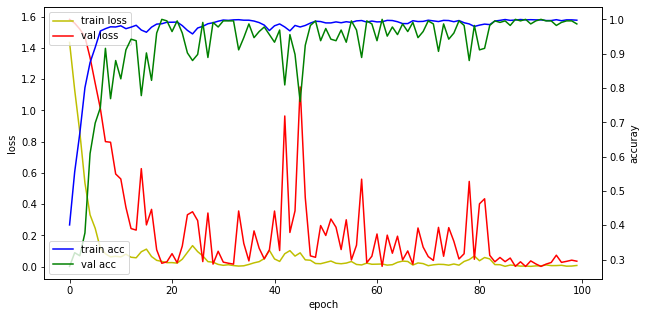

In [9]:
# 그래프 표현
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(10, 5))
acc_ax = loss_ax.twinx()

loss_ax.plot(curr_model_hist.history['loss'], 'y', label='train loss')
loss_ax.plot(curr_model_hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(curr_model_hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(curr_model_hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()   

In [10]:
# test data set으로 모델 평가하기
evaluate_metrics = model.evaluate(X_test, Y_test)      
print("\nTest Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nTest loss = " ,"{:.6f}".format(evaluate_metrics[0]))

8/8 [==============================] - 0s 26ms/step - loss: 0.0244 - accuracy: 0.9840

Test Accuracy =  98.40% 
Test loss =  0.024416


In [15]:
# test data 전처리하기
test_dir = 'C:/Users/ballj/OneDrive/custom_dataset/test'

def load_test_data():    
    images = []
    names = []
    size = 64,64
    for image in os.listdir(test_dir):
        temp = cv2.imread(test_dir + '/' + image)
        temp = cv2.resize(temp, size)
        images.append(temp)
        names.append(image)
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images, names

test_images, test_img_names = load_test_data()

In [16]:
# 5개 카테고리별 이미지 예측하기
def give_predictions(test_data):     
    predictions_classes = []
    for image in test_data:
        image = image.reshape(1,64,64,3)
        pred = model.predict_classes(image)
        predictions_classes.append(pred[0])
    return predictions_classes

predictions = give_predictions(test_images)

In [17]:
# 예측한 이미지 표현하기
def get_labels_for_plot(predictions):      
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_dict:
            if predictions[i] == labels_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

predictions_labels_plot = get_labels_for_plot(predictions)

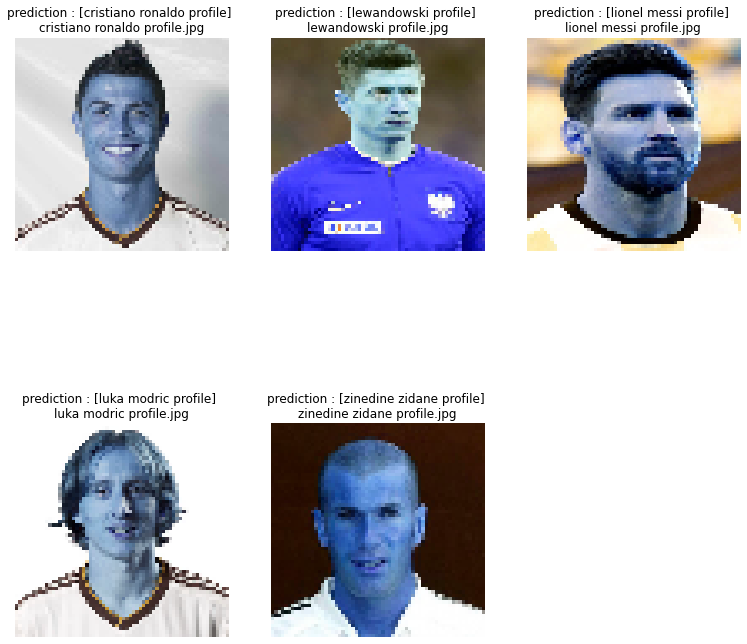

In [14]:
# 예측한 값 이미지로 보여주기
predfigure = plt.figure(figsize = (13,13))
def plot_image_1(fig, image, label, prediction, predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "prediction : [" + str(predictions_label) + "] "+ "\n" + label
    plt.title(title)
    return

image_index = 0
row = 2
col = 3
for i in range(1,(row*col)):
    plot_image_1(predfigure, test_images[image_index], test_img_names[image_index], predictions[image_index], predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()